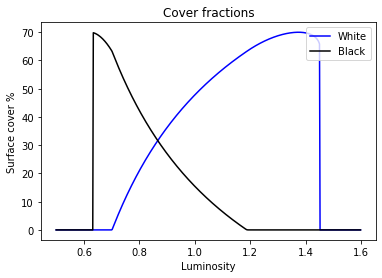

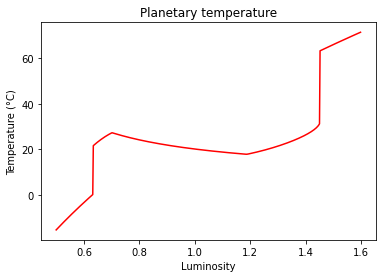

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import module as m 

def main(): 
    # Define constants and variables
    alphaw = 0.01   # Cover fraction of white daisies
    alphab = 0.01   # Cover fraction of black daisies
    p = 1           # The fraction of habitable surface
    alphag = p-alphaw-alphab # Cover fraction of bare ground
    aw = 0.75       # Albedo of white daisies
    ab = 0.25       # Albedo of black daisies
    ag = 0.5        # Albedo of bare ground
    gamma = 0.3     # The death rate 
    S = 1000        # Solar constant (W/m^2)
    maxn = 1000     # Maximum number of iterations
    tol = 0.000001  # Tollerance of solution
    luminosities = np.arange(0.5,1.6, 0.002) # Stelar luminosities
    alphaw_out = np.ones(len(luminosities))*np.nan # Output variable for white
    alphab_out = np.ones(len(luminosities))*np.nan # Output variable for black
    temp_out = np.ones(len(luminosities))*np.nan   # Output variable for temp
    
    # Main loop for changing luminosity
    for i,L in enumerate(luminosities):
        # Set a minimum for cover fractions
        if alphaw<0.01: alphaw = 0.01
        if alphab<0.01: alphab = 0.01
        alphag = p-alphaw-alphab
        # Reset counters
        n = 0
        changew, changeb = 1,1
        # Run loop for daisy earth.
        while (n<maxn) and (changew>tol) and (changeb>tol):
            # Store the initial cover fractions
            sw,sb = alphaw, alphab
            # Planetary albedo
            planet_albedo = m.albedo(alphaw,alphab,alphag,aw,ab,ag)
            # Planetary temperature
            T = m.planetary_temp(S,planet_albedo, L=L)
            # Local temperature
            Tw = m.local_temp(planet_albedo,aw,T)
            Tb = m.local_temp(planet_albedo,ab,T)
            # Birth rate
            betaw = m.beta(Tw)
            betab = m.beta(Tb)
            # Change in daisies
            dawdt = m.daisy_replicator(alphaw, alphag, betaw, gamma)
            dabdt = m.daisy_replicator(alphab, alphag, betab, gamma)
            # Integrate
            alphaw = m.euler(alphaw, dawdt)
            alphab = m.euler(alphab, dabdt)
            alphag = p-alphaw-alphab
            n += 1
        # Store the output
        alphaw_out[i] = alphaw
        alphab_out[i] = alphab
        temp_out[i] = T

    # Plot the results
    # Cover fractions
    white = plt.plot(luminosities,alphaw_out*100,'b', label='White')
    black = plt.plot(luminosities,alphab_out*100,'k', label='Black')
    plt.legend(loc='upper right')
    plt.xlabel('Luminosity')
    plt.ylabel('Surface cover %')
    plt.title('Cover fractions')
    plt.show()

    # Planetary temperature
    plt.figure()
    plt.plot(luminosities,temp_out-273.15,'r')
    plt.xlabel('Luminosity')
    plt.ylabel('Temperature (°C)')
    plt.title('Planetary temperature')
    plt.show()

if __name__ == '__main__': main()

